In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


# MC15ri

# D+ -> (eta -> gg) pi+

In [5]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr',]
             #'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             #'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask']

Dp_gg   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_gg_true = Dp_gg.query('Dp_isSignal==1')
Dp_gg_false = Dp_gg.query('Dp_isSignal!=1')


input_line_87:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_98:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_105:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## D+M

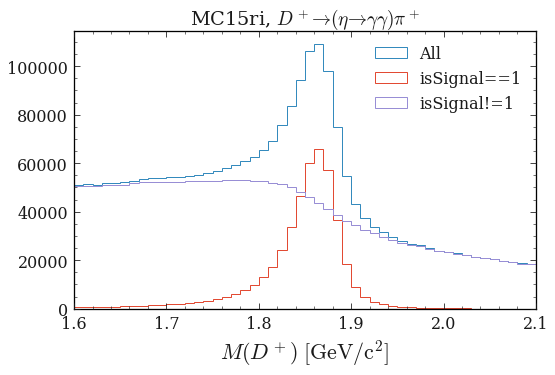

In [6]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## Pip pid

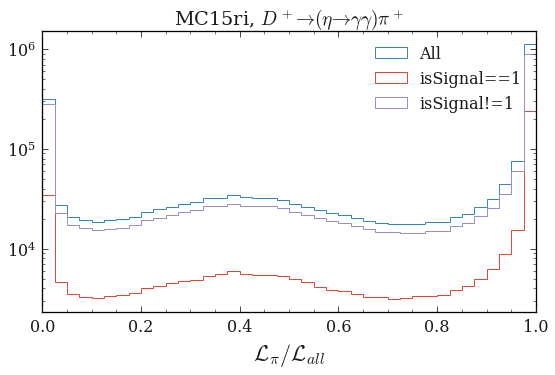

In [18]:
xrange = (0,1,41)
xm = np.linspace(*xrange)
var = 'Pip_pionID'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\mathcal{L}_{\pi}/\mathcal{L}_{all} $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
# plt.ylim(0,1e+5)

plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.tight_layout()
# plt.savefig(file_path)



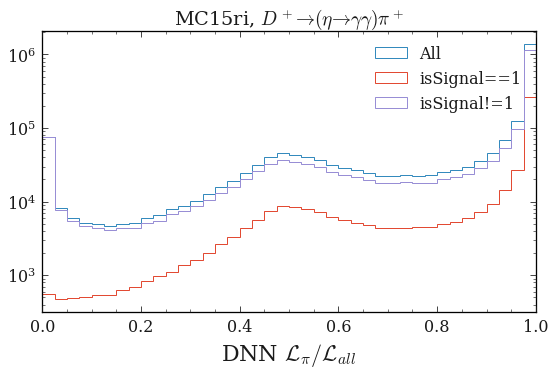

In [19]:
xrange = (0,1,41)
xm = np.linspace(*xrange)
var = 'Pip_pionIDNN'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'DNN $\mathcal{L}_{\pi}/\mathcal{L}_{all} $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.yscale('log')  # Setting the y-axis to logarithmic scale

plt.tight_layout()
# plt.savefig(file_path)



# D+ -> (eta -> pi+ pi- pi0) pi+

In [15]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 &&  etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_pi0_gamma1_p>0.1 && etapip_pi0_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
# base_filter+= ' && eta_Pi0'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             #'Dp_M','Dp_isSignal','Dp_CMS_p',\ #'Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'\
             'Dp_M','Dp_isSignal','Dp_CMS_p',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionID','Pip_mcPDG','Pip_dr','Pip_dr']

Dp_pipipi   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_pipipi_true = Dp_pipipi.query('Dp_isSignal==1')
Dp_pipipi_false = Dp_pipipi.query('Dp_isSignal!=1')


## D+M

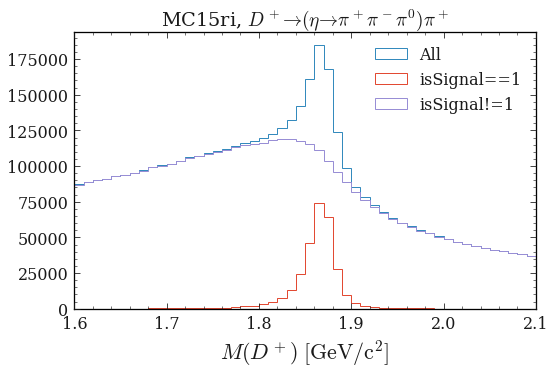

In [20]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## Pi0M

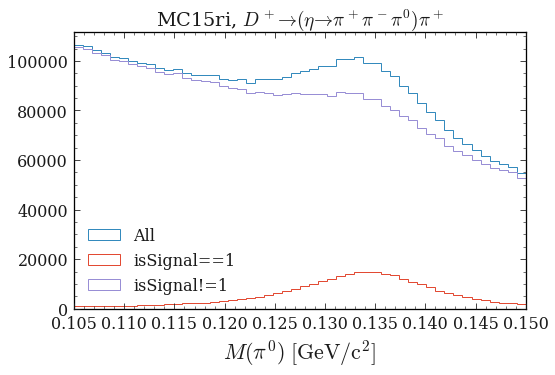

In [26]:
xrange = (0.105,0.150,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\pi^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig(file_path)



## "eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1"

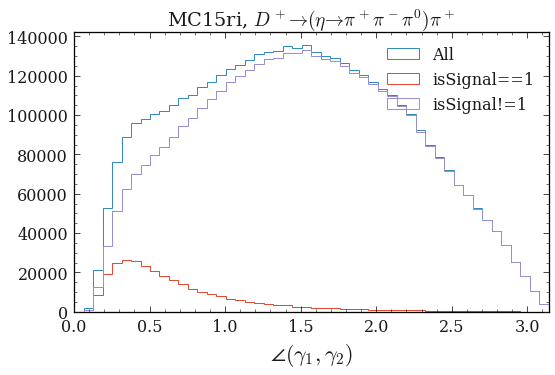

In [38]:
import math
xrange = (0,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterAngle_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\angle(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



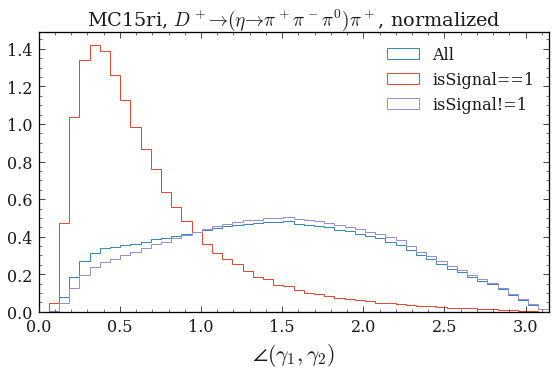

In [39]:
import math
xrange = (0,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterAngle_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\angle(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



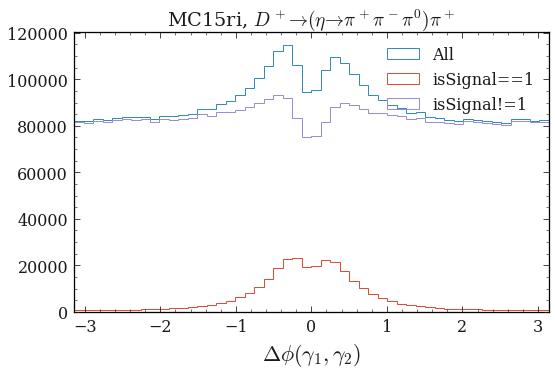

In [40]:
import math
xrange = (-math.pi,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



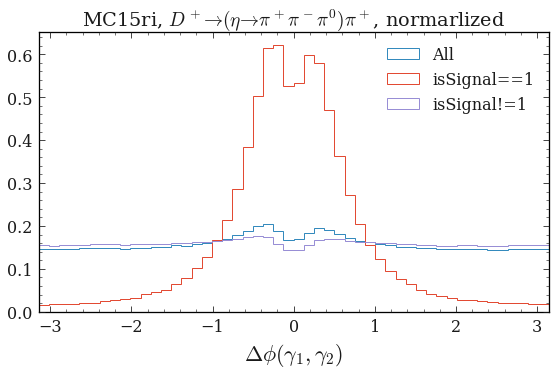

In [41]:
import math
xrange = (-math.pi,math.pi,51)
xm = np.linspace(*xrange)
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normarlized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Pi0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\gamma_1, \gamma_2)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## EtaM

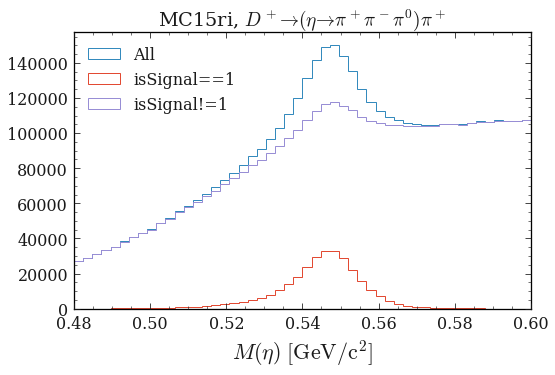

In [29]:
xrange = (0.48,0.6,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_EtaM_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig(file_path)



## Etap

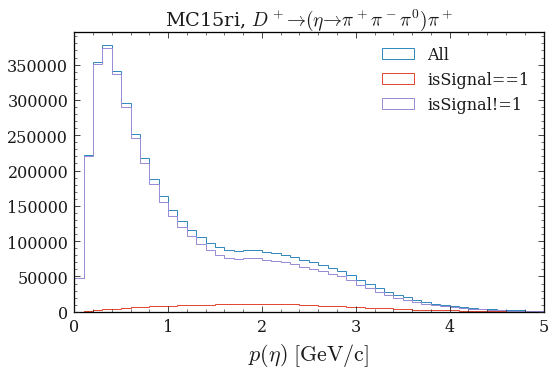

In [32]:
xrange = (0.,5,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Etap_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\eta)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



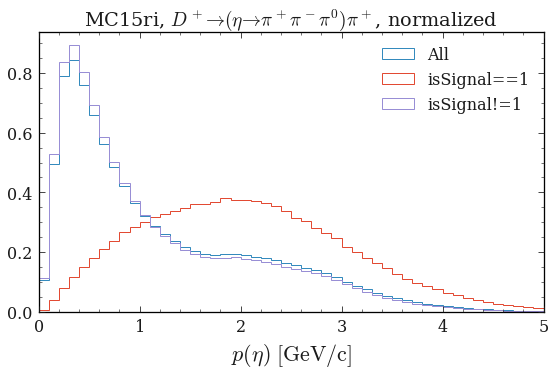

In [33]:
xrange = (0.,5,51)
xm = np.linspace(*xrange)
var = 'etapip_Eta_p'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etapip_pipipi_1M_Etap_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\eta)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)